Taller práctico - Python - PSL
===

**Valentina Vasquez Hernadez**  
vavasquezhe@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---


**Ejercicio N°1** De acuerdo con los archivos order contenidos en el directorio 'files' en el repositorio 'Python-for-data-science', unificar los datos en una única tabla que contenga la siguiente información:

* año.
* mes.
* día_mes.
* día_semana.
* Hora.
* order.id.
* customer.id.
* empoyee.id.

In [1]:
!head order2010

"","order.id","customer.id","employee.id","date"
"3182",3182,34,2,"2010-01-01.Fri.23:35:14"
"3183",3183,24,31,"2010-01-01.Fri.00:25:06"
"3184",3184,48,50,"2010-01-01.Fri.05:51:51"
"3185",3185,16,9,"2010-01-02.Sat.01:19:48"
"3186",3186,39,18,"2010-01-04.Mon.02:00:01"
"3187",3187,123,35,"2010-01-05.Tue.04:26:14"
"3188",3188,86,5,"2010-01-06.Wed.21:11:58"
"3189",3189,71,5,"2010-01-07.Thu.07:49:40"
"3190",3190,62,17,"2010-01-07.Thu.16:22:09"


In [2]:
import re
import glob

In [3]:
file_new = open('order.csv', 'w')
file_new.write("ano,mes,día_mes,día_semana,hora,order.id,customer.id,employee.id\n")

for filename in glob.glob("order2*"):
    
    file= open(filename, 'r')
    primera_linea = True
    
    for line in file:
        
        if primera_linea is True:
            primera_linea = False
            continue
    
        line = line.replace('"','')
        groups = re.search('[0-9]+-([0-9]+)-([0-9]+).([a-zA-z]+).([0-9]+:[0-9]+:[0-9]+)', line)
        old = re.search('[0-9]+,([0-9]+,[0-9]+,[0-9]+),', line)
        
        if groups:
            if old:
                temp = groups.group(0)
                new_line = str(filename[-4:]) +',' + groups.group(1)+','+groups.group(2)+','+groups.group(3)+','+groups.group(4)+','+old.group(1)+'\n'  
                line = line.replace(line,new_line)
        
        file_new.write(line)
    
    file.close()

file_new.close()

In [4]:
!tail order.csv

2016,06,23,Thu,05:34:23,5241,100,5
2016,06,23,Thu,18:18:41,5242,70,9
2016,06,23,Thu,08:42:03,5243,106,18
2016,06,24,Fri,05:13:30,5244,73,40
2016,06,24,Fri,04:36:52,5245,89,3
2016,06,25,Sat,16:41:43,5246,110,36
2016,06,25,Sat,10:40:45,5247,70,35
2016,06,25,Sat,07:33:32,5248,121,9
2016,06,27,Mon,09:15:51,5249,72,40
2016,06,29,Wed,08:46:08,5250,65,5


**Ejercicio N°2** De acuerdo con el archivo 'orderdetail' contenido en el directorio 'files' en el repositorio 'Python-for-data-science', formatear la información para que la tabla obtenida contenga:

* order.id.
* producr.id.
* ingreso. (producto entre la cantidad y el precio de la orden)

In [5]:
!head orderdetail

"","order.id","product.id","customer.id","quantity","price"
"1",1,133,124,0,123
"2",1,53,1,1,185
"3",1,58,66,6,137
"4",1,114,115,4,169
"5",1,127,42,5,138
"6",1,25,73,1,199
"7",2,90,44,5,175
"8",2,74,99,2,117
"9",2,55,114,11,170


In [6]:
file = open('detail.csv','r')
primera_linea= True
income ={}

for line in file:
    
    if primera_linea is True:
        primera_linea = False
        continue
    
    line = line.split(',')
    #clave = line[0] + '-' + line[1] 
    clave = line[0] 
    
    if clave in income.keys():
        income[clave] = income[clave]+[float(line[-1])*float(line[-2])]
    else:
        income[clave] = [float(line[-1])*float(line[-2])]

file.close()

income_group= income.copy()

for clave in income:
    income_group[clave] = round(sum(income[clave]),2)

file_out = open('detail_2.csv','w')

file_out.write('order.id,ingreso\n')

for clave in income_group:
    text = clave + '-' + str(income_group[clave])
    text = text.replace('-',',')
    file_out.write(text +'\n')
file_out.close()

In [7]:
!head detail_2.csv

order.id,ingreso
1,2572.0
2,2979.0
3,9317.0
4,7067.0
5,3663.0
6,3489.0
7,3100.0
8,5450.0
9,1905.0


**Ejercicio N°3** De acuerdo con las tablas generadas en los anteriores numerales, genere una tabla única que relacione los ingresos en cada orden con los detalles de la misma.

**Utilizando PSL**

In [8]:
file_new = open('completo.csv', 'w')
file_new.write("ano,mes,día_mes,día_semana,hora,order.id,customer.id,employee.id,income\n")

isfirstline = True

detail = open('detail_2.csv','r')
for line_detail in detail:
    
    if isfirstline is True:
        isfirstline = False
        continue
        
    line_list_det= line_detail.split(','); 
    
    order = open('order.csv','r')
    linea_uno = True
    for line_order in order:
        
        if linea_uno is True:
            linea_uno = False
            continue
        
        line_list_ord = line_order.split(',')
        
        if line_list_ord[5] == line_list_det[0]:
            income = line_list_det[1].replace('\n','')
            new_line = line_order+','+str(line_list_det[1])
            new_line = new_line.replace('\n','')
            new_line = new_line + '\n'
            line_order = line_order.replace(line_order,new_line)
            file_new.write(line_order)

order.close()
detail.close()

file_new.close()

In [10]:
!tail completo.csv

2016,06,23,Thu,05:34:23,5241,100,5,27584.0
2016,06,23,Thu,18:18:41,5242,70,9,14157.0
2016,06,23,Thu,08:42:03,5243,106,18,20862.0
2016,06,24,Fri,05:13:30,5244,73,40,11304.0
2016,06,24,Fri,04:36:52,5245,89,3,16090.0
2016,06,25,Sat,16:41:43,5246,110,36,23693.0
2016,06,25,Sat,10:40:45,5247,70,35,34082.0
2016,06,25,Sat,07:33:32,5248,121,9,20147.0
2016,06,27,Mon,09:15:51,5249,72,40,13927.0
2016,06,29,Wed,08:46:08,5250,65,5,1136.0


**Utilizando PANDAS**

In [11]:
import pandas
order_pandas = pandas.read_csv('order.csv',sep = ',', decimal=".")
detail_pandas  = pandas.read_csv('detail.csv',sep = ',', decimal=".")

In [12]:
order_pandas.head()

,ano,mes,día_mes,día_semana,hora,order.id,customer.id,employee.id
0,2000,1,4,Tue,08:53:37,1,57,8
1,2000,1,4,Tue,11:27:42,2,55,2
2,2000,1,5,Wed,23:10:39,3,34,8
3,2000,1,5,Wed,10:34:27,4,26,39
4,2000,1,5,Wed,23:15:30,5,119,13


In [13]:
detail_pandas.head()

,order.id,product.id,quantity,price
0,1,133,0,123
1,1,53,1,185
2,1,58,6,137
3,1,114,4,169
4,1,127,5,138


In [14]:
!head completo.csv

ano,mes,día_mes,día_semana,hora,order.id,customer.id,employee.id,income
2000,01,04,Tue,08:53:37,1,57,8,2572.0
2000,01,04,Tue,11:27:42,2,55,2,2979.0
2000,01,05,Wed,23:10:39,3,34,8,9317.0
2000,01,05,Wed,10:34:27,4,26,39,7067.0
2000,01,05,Wed,23:15:30,5,119,13,3663.0
2000,01,06,Thu,00:52:03,6,34,9,3489.0
2000,01,08,Sat,05:04:57,7,40,49,3100.0
2000,01,08,Sat,09:12:14,8,102,7,5450.0
2000,01,11,Tue,16:15:22,9,47,2,1905.0


In [16]:
o=order_pandas.set_index('order.id')
d=detail_pandas.set_index('order.id')

d['income'] = d.quantity * d.price

completo = pandas.concat([o, d], axis=1, join='inner')
completo.drop(completo.columns[[8, 9]], axis=1).head() 

,ano,mes,día_mes,día_semana,hora,customer.id,employee.id,product.id,income
order.id,,,,,,,,,
1,2000,1,4,Tue,08:53:37,57,8,133,0
1,2000,1,4,Tue,08:53:37,57,8,53,185
1,2000,1,4,Tue,08:53:37,57,8,58,822
1,2000,1,4,Tue,08:53:37,57,8,114,676
1,2000,1,4,Tue,08:53:37,57,8,127,690


**Ejercicio N°4** De acuerdo con la tabla integrada, realice un análisis descriptivo de los clientes, productos y empleados que generan mayores ingresos a la compañía.

In [17]:
import pandas 
table = pandas.read_csv('completo.csv',sep = ',', decimal=".")

In [18]:
table.head()

,ano,mes,día_mes,día_semana,hora,order.id,customer.id,employee.id,income
0,2000,1,4,Tue,08:53:37,1,57,8,2572.0
1,2000,1,4,Tue,11:27:42,2,55,2,2979.0
2,2000,1,5,Wed,23:10:39,3,34,8,9317.0
3,2000,1,5,Wed,10:34:27,4,26,39,7067.0
4,2000,1,5,Wed,23:15:30,5,119,13,3663.0


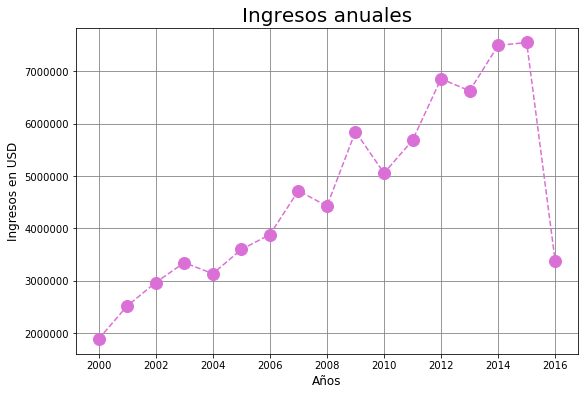

In [21]:
import matplotlib.pyplot as plt
plt.figure(3, figsize=(9, 6))
plt.plot(table.groupby(['ano']).sum()['income'], linestyle='dashed', marker='o', markersize=12,color='orchid')
plt.title("Ingresos anuales", fontsize=20)  # Establece el título del gráfico
plt.xlabel("Años", fontsize=12)   # Establece el título del eje x 
plt.ylabel("Ingresos en USD", fontsize=12)   # Establece el título del eje y
plt.grid(True, color='grey')
plt.show()

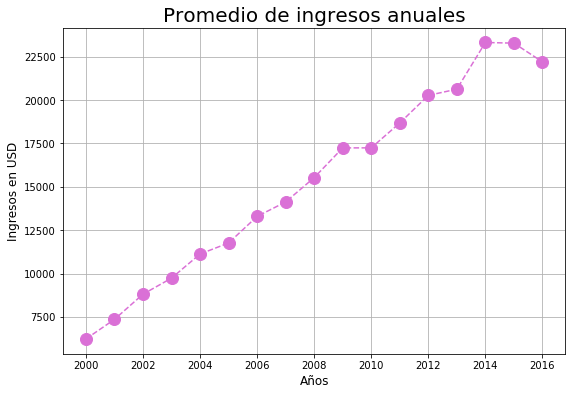

In [22]:
plt.figure(3, figsize=(9, 6))
plt.plot(table.groupby(['ano']).mean()['income'], linestyle='dashed', marker='o', markersize=12,color='orchid')
plt.title("Promedio de ingresos anuales", fontsize=20)  # Establece el título del gráfico
plt.xlabel("Años", fontsize=12)   # Establece el título del eje x 
plt.ylabel("Ingresos en USD", fontsize=12)   # Establece el título del eje y
plt.grid(True)
plt.show()

In [24]:
file_3 =table.set_index('ano')
g=[]
for i in range(2000,2016):
    l=[]
    l.append(list(file_3.loc[i, 'income']))
    g.append(l)

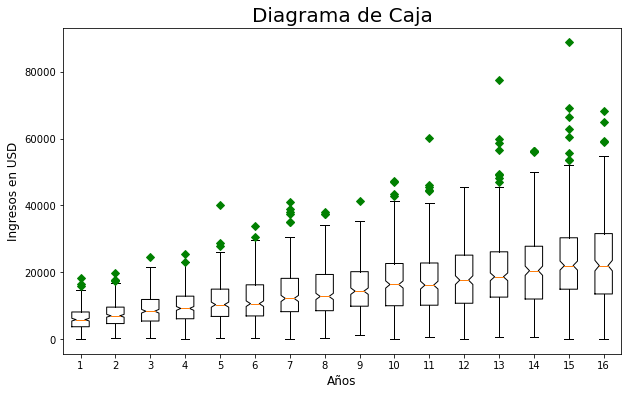

In [25]:
import matplotlib.pyplot as plt
plt.figure(3, figsize=(10, 6))
plt.boxplot(g ,4,'gD',0.75, meanline=True)
plt.ylabel('Ingresos en USD',fontsize=12)
plt.xlabel('Años',fontsize=12)
plt.title('Diagrama de Caja', fontsize=20)
plt.show()

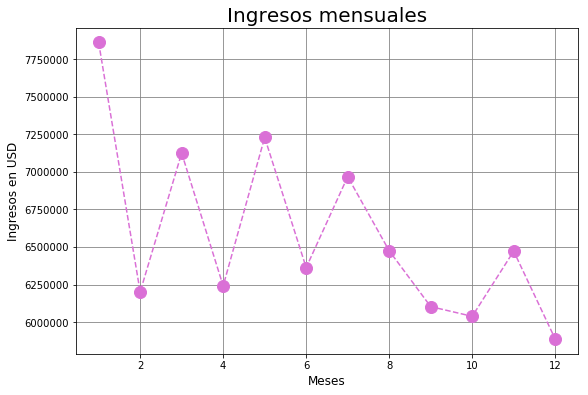

In [26]:
plt.figure(3, figsize=(9, 6))
plt.plot(table.groupby(['mes']).sum()['income'], linestyle='dashed', marker='o', markersize=12,color='orchid')
plt.title("Ingresos mensuales", fontsize=20)  # Establece el título del gráfico
plt.xlabel("Meses", fontsize=12)   # Establece el título del eje x 
plt.ylabel("Ingresos en USD", fontsize=12)   # Establece el título del eje y
plt.grid(True, color='grey')
plt.show()

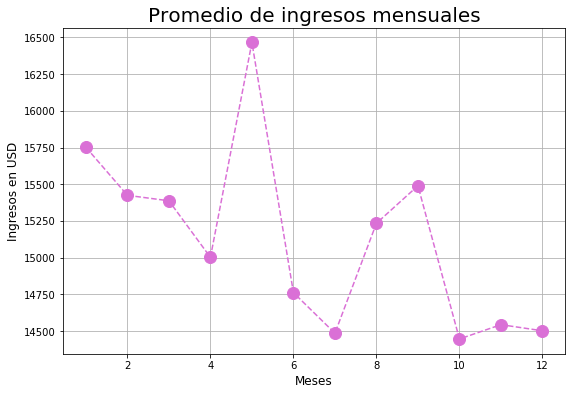

In [482]:
plt.figure(3, figsize=(9, 6))
plt.plot(table.groupby(['mes']).mean()['income'], linestyle='dashed', marker='o', markersize=12,color='orchid')
plt.title("Promedio de ingresos mensuales", fontsize=20)  # Establece el título del gráfico
plt.xlabel("Meses", fontsize=12)   # Establece el título del eje x 
plt.ylabel("Ingresos en USD", fontsize=12)   # Establece el título del eje y
plt.grid(True)
plt.show()

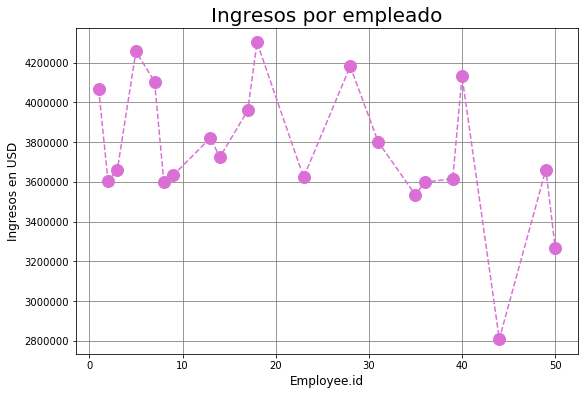

In [460]:
plt.figure(3, figsize=(9, 6))
plt.plot(table.groupby(['employee.id']).sum()['income'], linestyle='dashed', marker='o', markersize=12,color='orchid')
plt.title("Ingresos por empleado", fontsize=20)  # Establece el título del gráfico
plt.xlabel("Employee.id", fontsize=12)   # Establece el título del eje x 
plt.ylabel("Ingresos en USD", fontsize=12)   # Establece el título del eje y
plt.grid(True, color='grey')
plt.show()

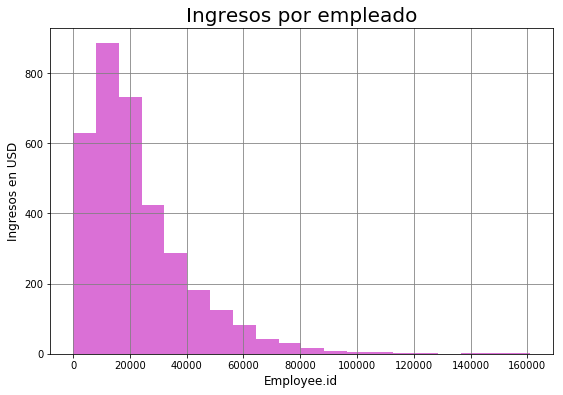

In [30]:
plt.figure(3, figsize=(9, 6))
plt.hist(table.groupby(['ano','mes','día_mes']).sum()['income'], bins = 20,color='orchid')
plt.title("Ingresos por empleado", fontsize=20)  # Establece el título del gráfico
plt.xlabel("Employee.id", fontsize=12)   # Establece el título del eje x 
plt.ylabel("Ingresos en USD", fontsize=12)   # Establece el título del eje y
plt.grid(True, color='grey')
plt.show()

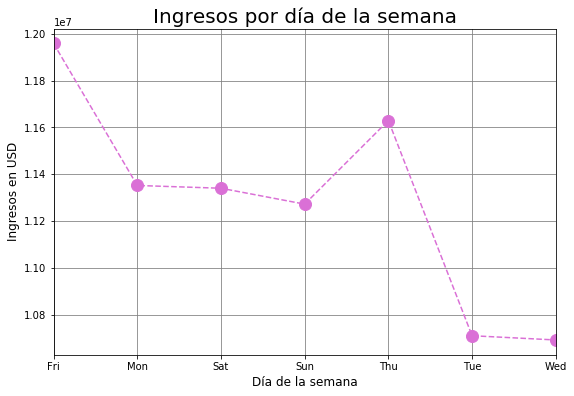

In [31]:
plt.figure(3, figsize=(9, 6))
table.groupby(['día_semana']).sum()['income'].plot(linestyle='dashed', marker='o', markersize=12,color='orchid')
plt.title("Ingresos por día de la semana", fontsize=20)  # Establece el título del gráfico
plt.xlabel("Día de la semana", fontsize=12)   # Establece el título del eje x 
plt.ylabel("Ingresos en USD", fontsize=12)   # Establece el título del eje y
plt.grid(True, color='grey')
plt.show()

---

Taller práctico - Python - PSL
===

**Valentina Vasquez Hernadez**  
vavasquezhe@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  